---
title: "Convertir el análisis exploratorio en acción"
---

El análisis exploratorio de datos es un paso crucial en el flujo de trabajo de la ciencia de datos, ¡por no esl el final! Ahora es el momento de aprender técnicas y consideraciones que puedes utilizar para avanzar con éxito en tus proyectos una vez que hayas terminado de explorar.

## Consideraciones para datos categóricos

-   Por qué ejecutar EDA?
    -   Detectar patrones y relaciones.
    -   Generar preguntas o hipótesis.
    -   Preparar datos para modelos de machine learning.
-   Representatividad de los datos
    -   La muestra debe representar la población.
    -   Por ejemplo:
        -   Educación versus ingresos en USA
            -   No se pueden usar datos de Francia
-   Clases Categóricas
    -   Clases = etiquetas
    -   Ejemplo, actitudes de las personas hacia el matrimonio.
        -   Estado civil
            -   Soltero
            -   Casado
            -   Divorciado
-   Desbalance de Clases

![](images/paste-66.png)

-   Frecuencia de Clases

In [1]:
#| echo: true
#| eval: false
print(planes('Destination').value_counts())

![](images/paste-67.png)

-   Frecuencia relativa de clases

    -   40% de los vuelos internos de la India van hacia Delhi.

In [2]:
#| echo: true
#| eval: false
planes['Destination'].value_counts(normalize=True)

![](images/paste-68.png)

Es nuestra muestra representativa de la población? (Vuelos internos de India)

-   Tabulación Cruzada

    -   Es otro método para observar la frecuencia de clase, que permite examinar la frecuencia de combinaciones de clases

    ![](images/paste-69.png)

In [3]:
#| echo: true
#| eval: false
pd.crosstab(planes['Source'], planes['Destination'])

![](images/paste-70.png)

-   Extendiendo la tabulación cruzada

| Source   | Destination | Median Price (IDR) |
|----------|-------------|--------------------|
| Banglore | Delhi       | 4232.21            |
| Banglore | New Delhi   | 12114.56           |
| Chennai  | Kolkata     | 3859.76            |
| Delhi    | Cochin      | 9987.63            |
| Kolkata  | Banglore    | 9654.21            |
| Mumbai   | Hyderabad   | 3431.97            |

-   Agregación de valores con pd.crosstab()

In [4]:
#| echo: true
#| eval: false
pd.crosstab(planes['Source'], planes['Destination'],
           values=planes['Price'], aggfunc='median')

![](images/paste-71.png)

Los resultados muestran valores de la mediana para todas las rutas posibles en el conjunto de datos.

-   Comparando la muestra con la población

| Source   | Desitnation | Median Price (IDR) | Median Price (dataset) |
|----------|-------------|--------------------|------------------------|
| Banglore | Delhi       | 4232.21            | 4823.0                 |
| Banglore | New Delhi   | 12114.56           | 10976.50               |
| Chennai  | Kolkata     | 3859.76            | 3850.0                 |
| Delhi    | Cochin      | 9987.63            | 10260.0                |
| Kolkata  | Banglore    | 9654.21            | 9345.0                 |
| Mumbai   | Hyderabad   | 3431.97            | 3342.0                 |

### Comprobación del desequilibrio de clases

La [Encuesta Kaggle 2022](https://www.kaggle.com/kaggle-survey-2022) recoge la información sobre la formación de los científicos de datos, sus tecnologías y técnicas preferidas. Se considera una visión precisa de lo que está ocurriendo en la ciencia de datos, basada en el volumen y el perfil de los que responden.

Una vez examinados los títulos de los puestos y categorizados para alinearlos con nuestro `salaries` DataFrame\`, puedes ver la siguiente proporción de categorías laborales en la encuesta Kaggle:

| Categoría laboral   | Frecuencia relativa |
|---------------------|---------------------|
| Ciencia de datos    | 0,281236            |
| Análisis de datos   | 0,224231            |
| Otros               | 0,214609            |
| Dirección           | 0,121300            |
| Machine Learning    | 0,083248            |
| Ingeniería de datos | 0,075375            |

Pensando en los resultados de la encuesta Kaggle como población, tu tarea consiste en averiguar si el DataFrame `salaries` es representativo comparando la frecuencia relativa de las categorías laborales.

In [5]:
import pandas as pd
ruta = './data/salaries.csv'
salaries = pd.read_csv(ruta)
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,2020,Machine Learning Scientist,SE,FT,20688070.0,JP,JP,S,0.0,248256.840,Machine Learning
1,2020,Big Data Engineer,SE,FT,8674985.0,GB,GB,M,50.0,104099.820,Data Engineering
2,2020,Product Data Analyst,MI,FT,1591390.0,HN,HN,S,0.0,19096.680,Data Analytics
3,2020,Machine Learning Engineer,SE,FT,11935425.0,US,US,L,50.0,143225.100,Machine Learning
4,2020,Data Analyst,EN,FT,5729004.0,US,US,L,100.0,68748.048,Data Analytics


#### Instrucciones

-   Imprime la frecuencia relativa de la columna `Job_Category` de `salaries` DataFrame

::: callout-note
Para exportar el dataset en formato CSV dentro de DataCamp y luego copiarlo:

``` python
print(salaries.to_csv(index=False))
```
:::

In [6]:
# Print the relative frequency of Job_Category
print(salaries['Job_Category'].value_counts(normalize=True))

Job_Category
Data Science        0.277641
Data Engineering    0.272727
Data Analytics      0.226044
Machine Learning    0.120393
Other               0.068796
Managerial          0.034398
Name: proportion, dtype: float64


Parece que Data Science es la clase más popular y tiene una representación similar. Aún así, las otras categorías tienen frecuencias relativas bastante diferentes, lo cual pordría no ser sorprendente dado que el público objetivo son científico de datos. Dada la diferencia en las frecuencias relativas, ¿puedes confiar en que el DataFrame `salaries` representa con precisión los roles gerenciales?

### Tabulación cruzada

La tabulación cruzada puede ayudar a identificar cómo se combinan las observaciones.

Utilizando el conjunto de datos `salaries`, que se ha importado como un DataFrame `pandas`, realizarás una tabulación cruzada de múltiples variables, incluyendo el uso de la agregación, para ver la relación entre 'Company_Size' y otras variables.

#### Instrucciones

1.  Realiza una tabulación cruzada, estableciendo `Company_Size` como índice, y las columnas a las clases en `Experience`.

In [7]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries['Company_Size'], salaries['Experience']))

Experience    EN  EX  MI   SE
Company_Size                 
L             24   7  49   44
M             25   9  58  136
S             18   1  21   15


2.  Cruza 'Job_Category' y las clases de 'Company_Size' como nombres de columna.

In [8]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries['Job_Category'], salaries['Company_Size']))

Company_Size       L   M   S
Job_Category                
Data Analytics    23  61   8
Data Engineering  28  72  11
Data Science      38  59  16
Machine Learning  17  19  13
Managerial         5   8   1
Other             13   9   6


3.  Actualiza `pd.crosstab()` para que devuelva los valores medios de `Salary_USD`.

In [9]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries['Job_Category'], salaries['Company_Size'], values= salaries['Salary_USD'], aggfunc='mean'))

Company_Size                  L              M             S
Job_Category                                                
Data Analytics    112851.749217   95912.685246  53741.877000
Data Engineering  118939.035000  121287.060500  86927.136000
Data Science       96489.520105  116044.455864  62241.749250
Machine Learning  140779.491529  100794.236842  78812.586462
Managerial        190551.448800  150713.628000  31484.700000
Other              92873.911385   89750.578667  69871.248000


Ésta es una función útil para examinar la combinación de frecuencias, así como para encontrar estadísticas agregadas. ¡Parece que el salario medio más alto es para roles de datos gerenciales en grandes empresas!

## Generar nuevas Características

-   Correlación

In [10]:
#| echo: true
#| eval: false
sns.heatmap(planes.corr(numeric_only=True), annot=True)
plt.show()

![](images/paste-72.png)

-   Viendo el tipo de datos

In [11]:
#| echo: true
#| eval: false
print(planes.dtypes)

![](images/paste-73.png)

-   Total Stops

In [12]:
#| echo: true
#| eval: false
print(planes['Total_Stops'].value_counts())

![](images/paste-74.png)

Se observa que es necesario eliminar algunos caracteres.

-   Limpiando Total Stops

In [13]:
#| echo: true
#| eval: false
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stops', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stop', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace('non-stop', '0')
planes['Total_Stops'] = planes['Total_Stops'].astype(int)

-   Correlación

In [14]:
#| echo: true
#| eval: false
sns.heatmap(planes.corr(numeric_only=True), annot=True)
plt.show()

![](images/paste-75.png)

-   Fechas

In [15]:
#| echo: true
#| eval: false
print(planes.dtypes)

![](images/paste-76.png)

-   Extrayendo el mes y el día de la semana

In [16]:
#| echo: true
#| eval: false
planes['month'] = planes['Date_of_Journey'].dt.month
planes['weekday'] = planes['Date_of_Journey'].dt.weekday
print(planes[['month', 'weekday', 'Date_of_Journey']].head())

![](images/paste-77.png)

-   Tiempos de salidas y llegadas

In [17]:
#| echo: true
#| eval: false
planes['Dep_Hour'] = planes['Dep_Time'].dt.hour
planes['Arrival_Hour'] = planes['Arrival_Time'].dt.hour

-   Correlación

![](images/paste-78.png)

No hay correlaciones, pero no lo sabríamos si no se hubieran generado nuevas características.

-   Creando características

In [18]:
#| echo: true
#| eval: false
print(planes['Price'].describe())

![](images/paste-79.png)

| Rango             | Tipo de tiquete |
|-------------------|-----------------|
| \<= 5228          | Economy         |
| \> 5528 \<= 8355  | Premium Economy |
| \> 8355 \<= 12373 | Business Class  |
| \> 12373          | First Class     |

-   Estadística descriptiva

In [19]:
#| echo: true
#| eval: false
twenty_fifth = planes['Price'].quantile(0.25)
median = planes['Price'].median()
seventy_fifth = planes['Price'].quantile(0.75)
maximum = planes['Price'].max()

-   Etiquetas y bins

In [20]:
#| echo: true
#| eval: false
labels = ['Economy', 'Premium Economy', 'Business Class', 'First Class']
bins = [0, twenty_fifth, median, seventy_fifth, maximum]

-   pd.cut()

![](images/paste-80.png)

In [21]:
#| echo: true
#| eval: false
planes['Price_Category'] = pd.cut(planes['Price'], labels=labels, bins=bins)

-   Categoría de precios

In [22]:
#| echo: true
#| eval: false
print(planes[['Price', 'Price_Category']].head())

![](images/paste-81.png)

-   Categoría de precio por aerolínea

In [23]:
#| echo: true
#| eval: false
sns.countplot(data=planes, x='Airline', hue='Price_Category')
plt.show()

![](images/paste-82.png)

### Extraer características para la correlación

En este ejercicio trabajarás con una versión del conjunto de datos `salaries` que contiene una nueva columna llamada "`date_of_response".

El conjunto de datos se ha leído comjo un DataFrame de pandas, con "`date_of_response`" como tipo de datos `datetime`.

Tu tarea consiste en extraer los atributos fecha-hora de esta columna y, a continuación, crear un mapa de calor para visualizar los coeficientes de correlación entre las variables.

::: {.callout-important collapse="true"}
Para realizar el ejercicio fue necesario bajar el DataFrame de Datacamp teniendo en cuenta la nueva columna, y cambiando el tipo de formato de la columna `date_of_response` usando los comandos:

In [24]:
#| echo: true
#| eval: false
print(salaries.to_csv(index=false))

:::

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ruta = './data/salaries_2.csv'
salaries = pd.read_csv(ruta)

# Cambia el tipo de datos de date_of_response
salaries['date_of_response'] = pd.to_datetime(salaries['date_of_response'])
salaries.head()

,Designation,date_of_response,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,Machine Learning Scientist,2020-01-07,SE,FT,20688070.0,JP,JP,S,0.0,248256.840,Machine Learning
1,Big Data Engineer,2020-09-19,SE,FT,8674985.0,GB,GB,M,50.0,104099.820,Data Engineering
2,Product Data Analyst,2020-11-21,MI,FT,1591390.0,HN,HN,S,0.0,19096.680,Data Analytics
3,Machine Learning Engineer,2020-11-29,SE,FT,11935425.0,US,US,L,50.0,143225.100,Machine Learning
4,Data Analyst,2020-09-07,EN,FT,5729004.0,US,US,L,100.0,68748.048,Data Analytics


#### Instrucciones 

- Extrae el mes de "`date_of_response`", almacenándolo como una columna llamada "`month`".

- Crea la columna "`weekday`", que contiene el día de la semana en que los participantes completaron la encuesta.

- Traza un mapa de calor, incluyendo las puntuaciones del coeficiente de correlación de Pearson.

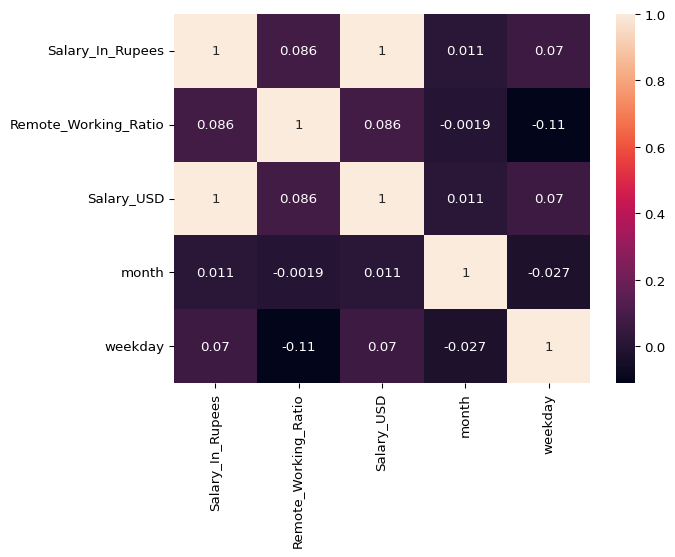

In [26]:
# Get the month of the response
salaries['month'] = salaries['date_of_response'].dt.month

# Extract the weekday of the response
salaries['weekday'] = salaries['date_of_response'].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(numeric_only=True), annot=True)
plt.show()

¡Fantástica creación de características! Parece que no hay relaciones significativas entre nuestras variables numéricas, así que veamos si convertir los datos numéricos en clases ofrece información adicional.

### Cálculo de los percentiles salariales

Tu tarea consiste en convertir la columna "`Salary_USD`" en categorías basadas en sus percentiles . Primero tienes que encontrar los percentiles y almacenarlos como variables.

#### Instrucciones

- Halla el percentil 25 de "`Salary_USD`"

- Guarda la mediana de "`Salary_USD`" como `salaries_median`.

- Obtén el percentil 75 de los salaries

In [27]:
# Find the 25th percentile 
twenty_fifth = salaries['Salary_USD'].quantile(0.25)

# Save the median
salaries_median = salaries['Salary_USD'].median()

# Gather the 75th percentile
seventy_fifth = salaries['Salary_USD'].quantile(0.75)

print(twenty_fifth, salaries_median, seventy_fifth)

60880.691999999995 97488.552 143225.1


¡Parece que el rango intercuartil está entre 60881 y 143225 dólares! ¡Ahora usemos estas variables para agregar una columna categórica de salario en el DataFrame



### Categorizar los salarios

¡Ahora es el momento de crear una nueva categoría! Utilizarás las variables `twenty_fifth`, `salaries_median` y `seventy_fifth`, que creaste en el ejercicio anterior, para dividir los salarios en diferentes etiquetas.

El resultado será una nueva columna llamada "`salary_level`", que incorporarás a una visualización para analizar el salario de los encuestados y en empresas de distintos tamaños.

#### Instrucciones

1. Crea `salaries_labels`, una lista que contenga "`entry`", "`mid`", "`senior`" y "`exec`".

In [28]:
# Create salary labels
salary_labels = ['entry', 'mid', 'senior', 'exec']

2. Termina `salary_ranges`, añadiendo el percentil 25, la mediana, el percentil 75  y el valor más grande de "`Salary_USD`"

In [29]:
# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries['Salary_USD'].max()]

3. Divide "`Salary_USD`" en función de las etiquetas y rangos que hayas creado.

In [30]:
# Create salary_level
salaries['salary_level'] = pd.cut(salaries['Salary_USD'], bins=salary_ranges, labels=salary_labels)

4. Utiliza `sns.countplot()` para visualizar el reconteo de "`Company_Size`", factrorizando las etiquetas de nivel salarial.

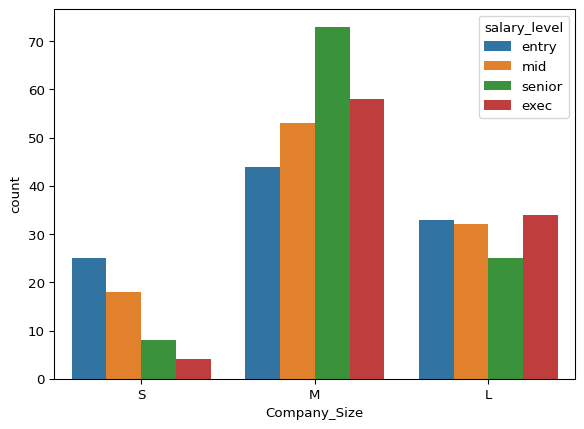

In [31]:
# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x='Company_Size', hue='salary_level')
plt.show()

Al usar `pd.cut()` para dividir los datos numéricos en categorías, se puede ver que una gran proporción de trabajadores en empresas pequeñas reciben salarios de nivel de "entrada", mientras que más personal en empresas medianas son recompensados con salarios de nivel "senior". ¡Ahora vamos a ver cómo generar hipótesis a medida que se llega al final de la fase de EDA!

## Generar hipótesis

### Comparar salarios

### Elegir una hipótesis